In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('E:/Insurance_claim_projects/Insurance_claim_data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,Female,27.900,0,Yes,3,16884.92400,Yes
1,18,Male,33.770,1,No,2,1725.55230,Yes
2,28,Male,33.000,3,No,2,4449.46200,No
3,33,Male,22.705,0,No,1,21984.47061,No
4,32,Male,28.880,0,No,1,3866.85520,Yes


In [3]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [4]:
df.shape

(1338, 8)

In [5]:
#check unique vales for all columns
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('---'*20)

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
------------------------------------------------------------
sex
['Female' 'Male']
------------------------------------------------------------
bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null object
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null object
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

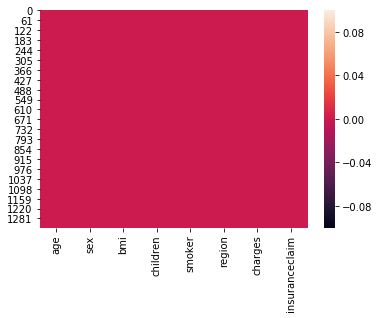

In [8]:
sns.heatmap(df.isnull())

In [9]:
#list of numeric colmns and categorical columns
num_cols=list(df.select_dtypes(exclude=['object']))
num_cols

['age', 'bmi', 'children', 'region', 'charges']

In [10]:
cat_cols=list(df.select_dtypes(include=['object']))
cat_cols

['sex', 'smoker', 'insuranceclaim']

In [11]:
#Replacing cat variable into numeric colums
df['sex'].replace({'Female':0,'Male':1},inplace=True)
df['smoker'].replace({'No':0,'Yes':1},inplace=True)
df['insuranceclaim'].replace({'No':0,'Yes':1},inplace=True)

In [12]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('---'*20)

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
------------------------------------------------------------
sex
[0 1]
------------------------------------------------------------
bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.

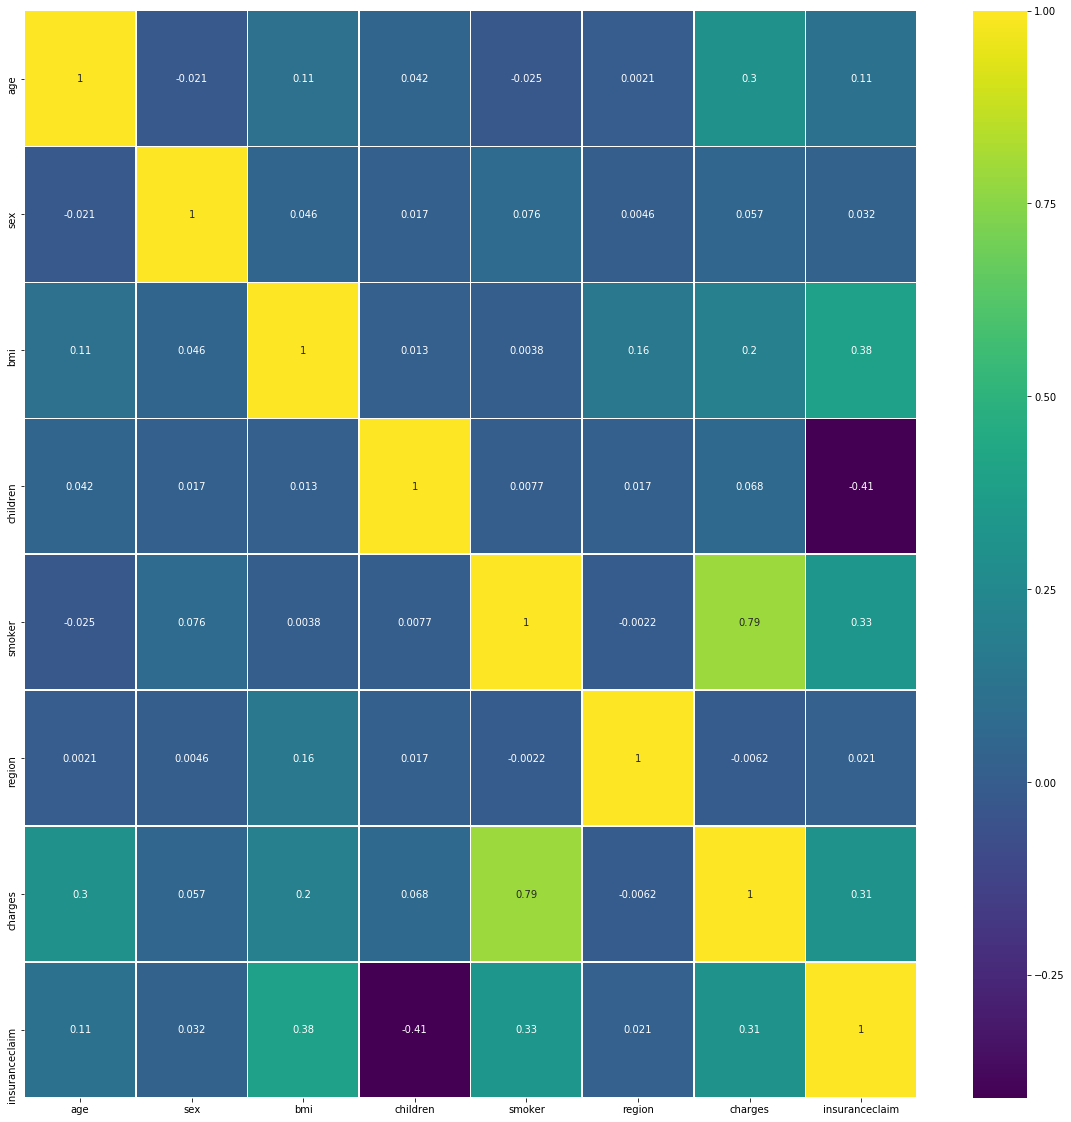

In [13]:
#Checking Correlation between features
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=0.5,ax=ax)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=df.drop('insuranceclaim',axis=1)
y=df['insuranceclaim']


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)


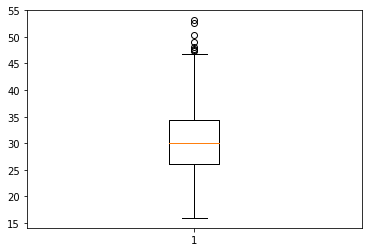

1    0.568224
0    0.431776
Name: insuranceclaim, dtype: float64

In [17]:
plt.boxplot(X_train['bmi'])

plt.show()
# set quantile (0.95)
q_value = X_train['bmi'].quantile(0.95)

# Check the value counts
y_train.value_counts(normalize=True)


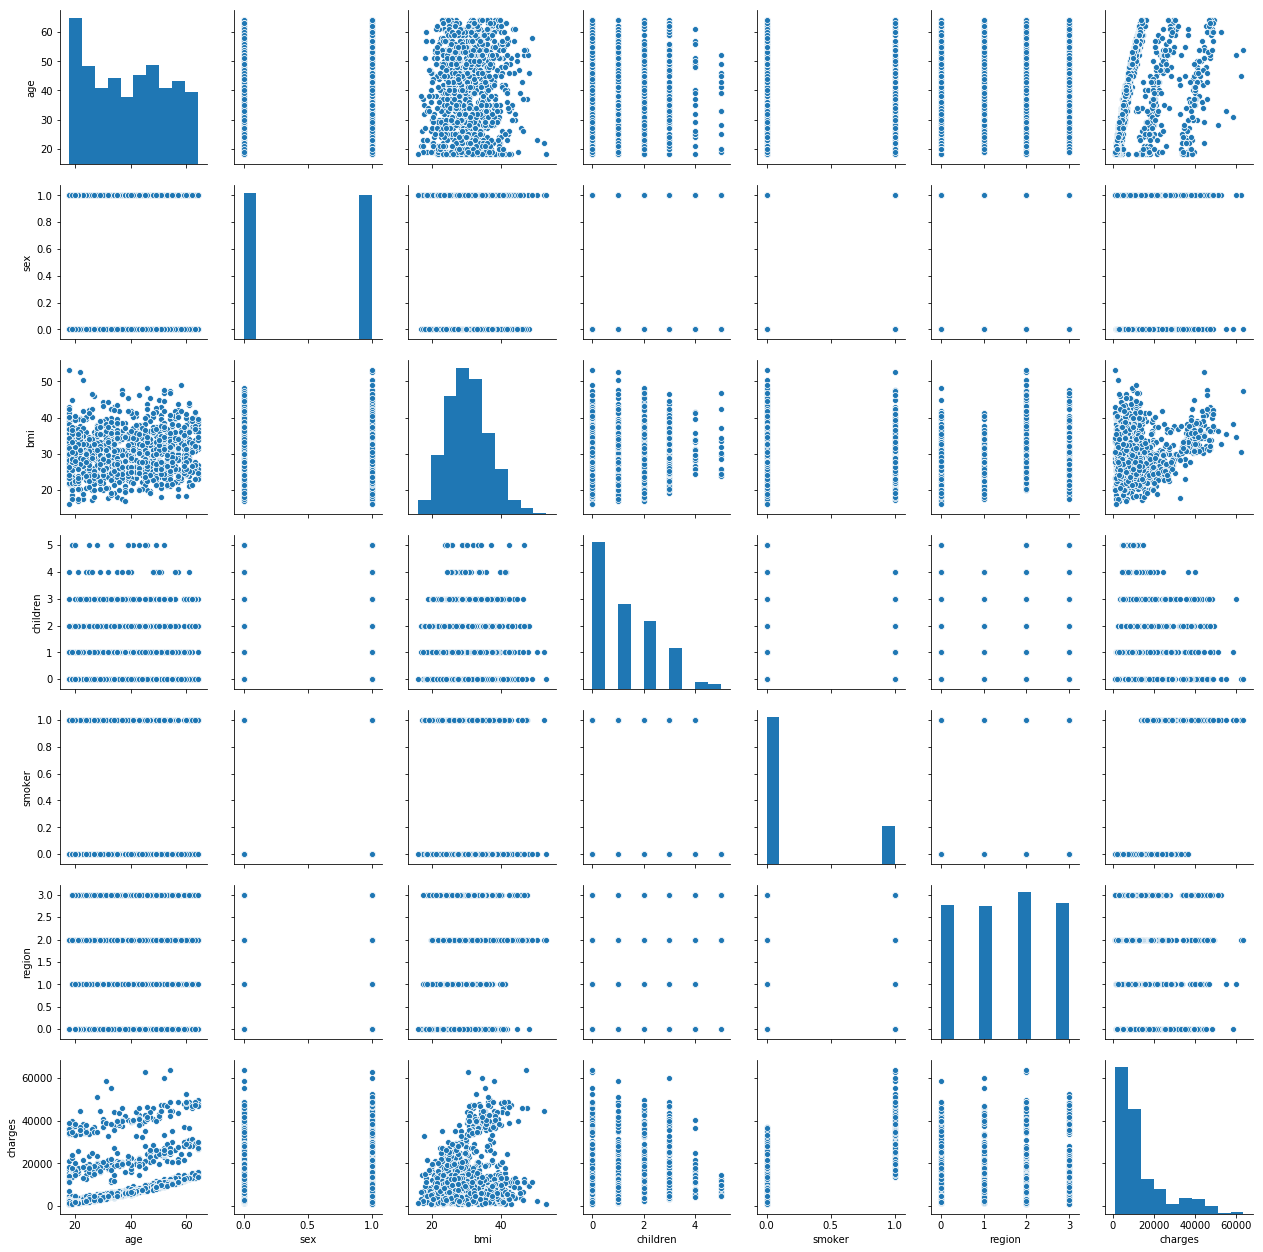

In [18]:
sns.pairplot(X_train)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Annaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        93
           1       0.87      0.91      0.89       175

   micro avg       0.85      0.85      0.85       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.85      0.85      0.85       268



In [23]:
from sklearn.metrics import roc_auc_score

In [24]:
print(roc_auc_score(y_test, predictions))

0.828110599078341


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
random_forest=RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)

In [27]:
random_forest.fit(X_train,y_train)
rf_predictions = random_forest.predict(X_test)


In [28]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        93
           1       0.90      0.92      0.91       175

   micro avg       0.88      0.88      0.88       268
   macro avg       0.87      0.87      0.87       268
weighted avg       0.88      0.88      0.88       268



In [29]:
print(roc_auc_score(y_test, rf_predictions))

0.8686021505376343


In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameter_grid={'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}
model_2 = RandomForestClassifier(n_estimators=50, random_state = 33)
p_tree = GridSearchCV(estimator=model_2,param_grid=parameter_grid,cv=5)
p_tree.fit(X_train,y_train)
gsrf_predictions=p_tree.predict(X_test)
print(classification_report(y_test,gsrf_predictions))



              precision    recall  f1-score   support

           0       0.91      0.97      0.94        93
           1       0.98      0.95      0.97       175

   micro avg       0.96      0.96      0.96       268
   macro avg       0.95      0.96      0.95       268
weighted avg       0.96      0.96      0.96       268



In [32]:
print(roc_auc_score(y_test, gsrf_predictions))

0.9581566820276498
